In [2]:
%load_ext autoreload
%autoreload 2
!pwd
import os
import sys 
if os.path.abspath("../../../") not in sys.path:
    sys.path.append(os.path.abspath("../../../")) 

import os
import networkx as nx
from rwtools.nemesis.graph.nemesis_node import AbstractNemesisNode
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg
from rwtools.nemesis.control_flow_graph import ControlFlowGraph


/home/gilles/git-repos/NemesisRetroWrite/retrowrite/rwtools/nemesis/samples_notebooks


In [3]:
import sys 
sys.executable

'/home/gilles/git-repos/NemesisRetroWrite/retrowrite/venv/bin/python'

In [4]:
from test_main import setup 

binary = os.path.abspath("./trees_v2/trees_v2")
outputfile = "./trees_v2/trees_v2.s"
loader, rw = setup(binary, outputfile)
rw.dump()

[*] Relocations for a section that's not loaded: .rela.dyn
[*] Relocations for a section that's not loaded: .rela.plt
[x] Could not replace value in .init_array
[x] Couldn't find valid section 3df0
[x] Couldn't find valid section 3fd8
[x] Couldn't find valid section 3fe0
[x] Couldn't find valid section 3fe8
[x] Couldn't find valid section 3ff0
[x] Couldn't find valid section 3ff8


[*] Relocations for a section that's not loaded: .rela.dyn
[*] Relocations for a section that's not loaded: .rela.plt
[x] Could not replace value in .init_array
[x] Couldn't find valid section 3df0
[x] Couldn't find valid section 3fd8
[x] Couldn't find valid section 3fe0
[x] Couldn't find valid section 3fe8
[x] Couldn't find valid section 3ff0
[x] Couldn't find valid section 3ff8


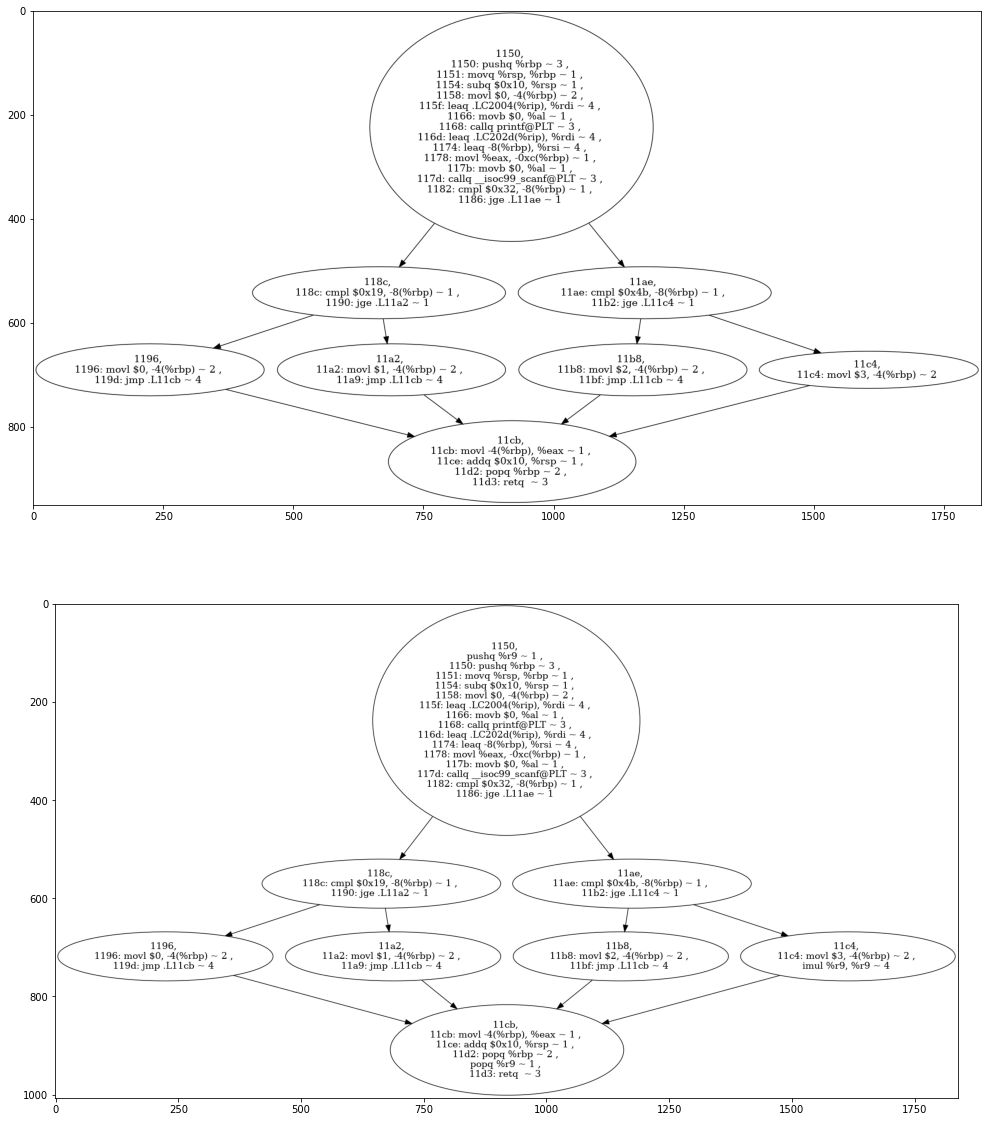

In [8]:
from rwtools.nemesis.nemesistool import NemesisInstrument
figs, axs = plt.subplots(2, figsize=(20,20))

binary = os.path.abspath("./trees_v2/trees_v2")
outputfile = "./trees_v2.s"

nemesis = NemesisInstrument(binary, outputfile)

axs[0].imshow(nemesis.render_cfg())


target_node = nemesis.cfg.get_node('1150')
nemesis.instrument(target_node)
    
axs[1].imshow(nemesis.render_cfg())

nemesis.dump()

# EVERYTHING BELOW THIS IS OLD


In [5]:
node = control_flow_graph.get_node("1150")
control_flow_graph.get_balanced_tree_latencies(node)

[[1, 1], [2, 3], [1, 1, 2, 3]]

In [6]:
from rwtools.nemesis.graph.balance import balance_latency_lists
# from rwtools.nemesis.latency_balancing import balance_node_latency_lists
import copy 

from rwtools.nemesis.nop_instructions import get_added_instructions
tree1_lats = control_flow_graph.get_balanced_tree_latencies(control_flow_graph.get_node("118c"))
tree2_lats = control_flow_graph.get_balanced_tree_latencies(control_flow_graph.get_node("11ae"))

tree1_lats, tree2_lats

a = [2,3]
b = [2, 3, 3, 3, 3, 3]
balanced = balance_latency_lists(tree1_lats, tree2_lats)
print(balanced)

[2, 3] [3, 3, 3, 3, 2, 3]
[1, 1, 2, 3] [1, 1, 2, 3]
[[3, 3, 3, 3, 2, 3], [1, 1, 2, 3]]


[*] Relocations for a section that's not loaded: .rela.dyn
[*] Relocations for a section that's not loaded: .rela.plt
[x] Could not replace value in .init_array
[x] Couldn't find valid section 3df0
[x] Couldn't find valid section 3fd8
[x] Couldn't find valid section 3fe0
[x] Couldn't find valid section 3fe8
[x] Couldn't find valid section 3ff0
[x] Couldn't find valid section 3ff8
118c


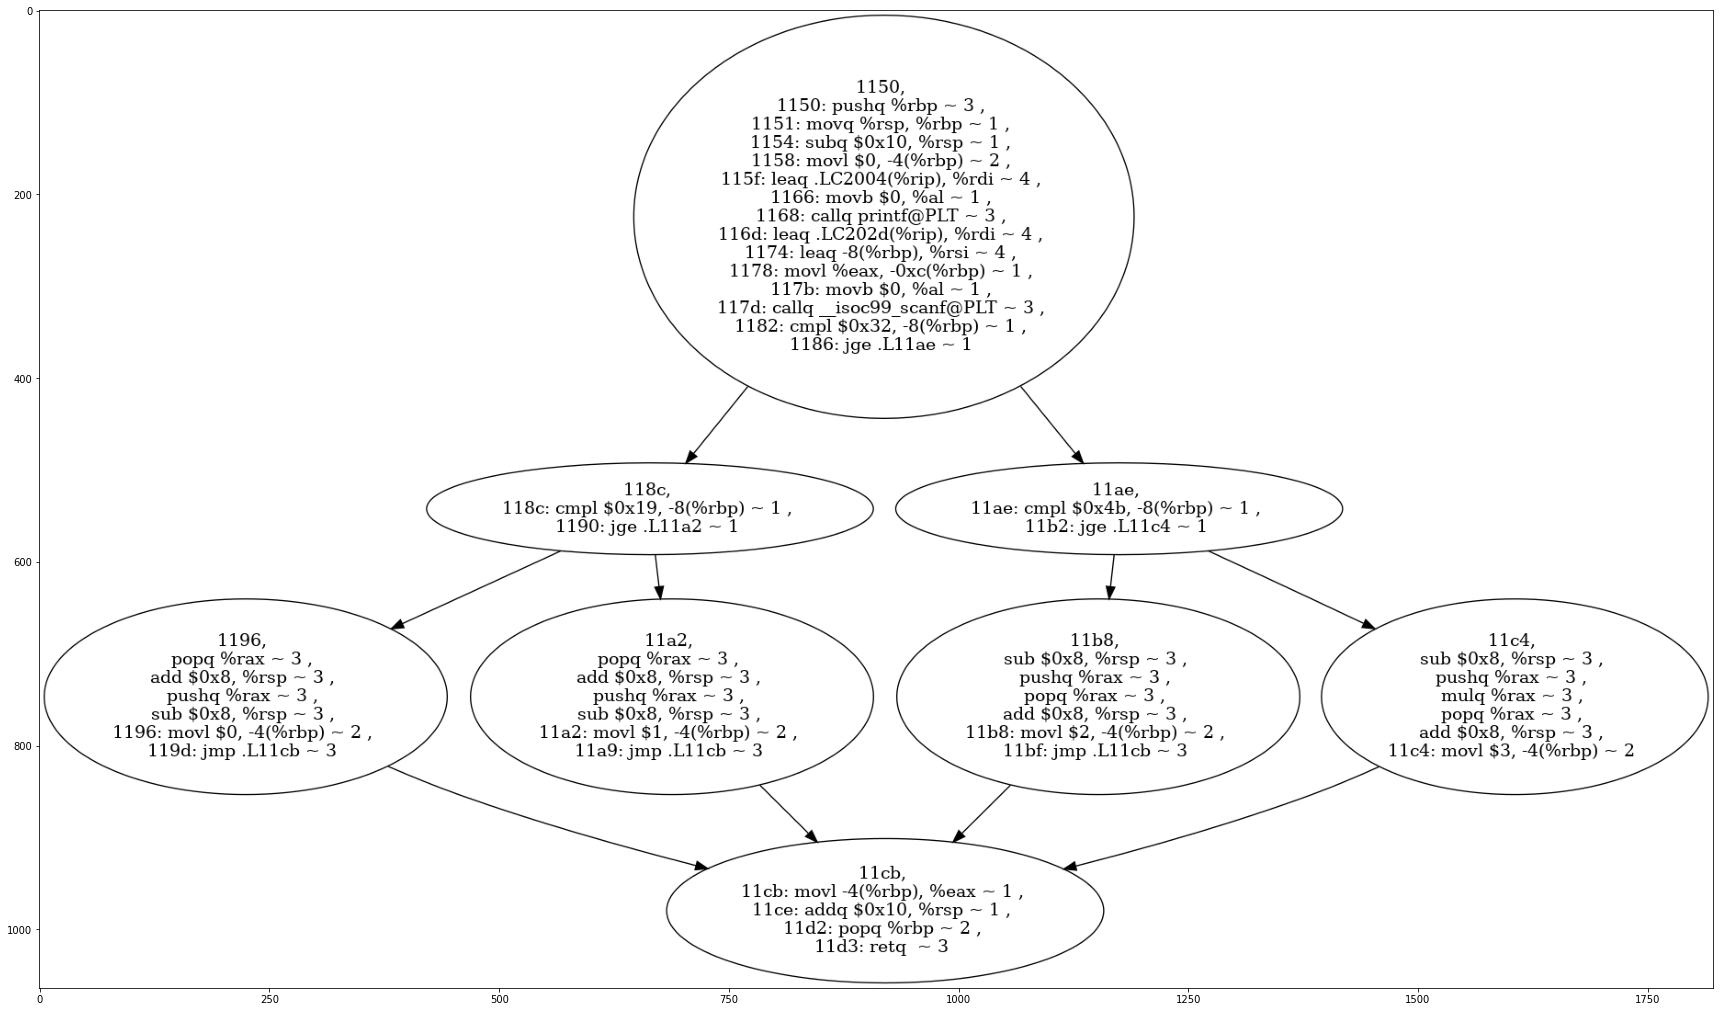

In [7]:
outputfile = "./trees_v2/trees_v2_rw.s"
loader, rw = setup(binary, outputfile)
function_names = loader.container.function_names
nodes, graph = create_graph_structure(loader.container, "main")
fig, axs = plt.subplots(1, figsize=(30, 30))

control_flow_graph = ControlFlowGraph(nodes=nodes, graph=graph)
control_flow_graph.merge_consecutive_nodes()
# control_flow_graph.unwind_graph()

# control_flow_graph.insert_nodes()
axs.imshow(to_img(graph))
target_node = control_flow_graph.get_node('1150')

balance_branching_point(control_flow_graph, target_node)
axs.imshow(to_img(graph))

target_node = control_flow_graph.get_node('118c')

print(target_node.id)
control_flow_graph.replace_latencies_descendants(control_flow_graph.get_node("118c"), balanced)

axs.imshow(to_img(graph))

rw.dump()


In [8]:
# 